In [3]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as au
import astropy.constants as sc
from scipy.constants import G
import time

**1-1**

takes in a csv of M(sub(in))(R)

In [4]:
arb_data = pd.read_csv('arbitrary data.csv')

In [6]:
R_dist = arb_data['R in pc '].to_numpy()
bulge = 10**(arb_data['bulge'].to_numpy())
disk = 10**(arb_data['disk'].to_numpy())
halo = 10**(arb_data['halo'].to_numpy())
total = bulge + disk + halo

In [7]:
bulge

array([3.16227766e+05, 1.77827941e+06, 5.62341325e+06, 1.00000000e+07,
       1.77827941e+07, 3.16227766e+07, 3.98107171e+07, 5.01187234e+07,
       6.30957344e+07, 7.94328235e+07, 3.16227766e+08, 6.30957344e+08,
       1.00000000e+09, 1.58489319e+09, 1.99526231e+09, 2.51188643e+09,
       2.81838293e+09, 3.16227766e+09, 3.54813389e+09, 6.30957344e+09,
       1.00000000e+10, 1.12201845e+10, 1.25892541e+10, 1.41253754e+10,
       1.31825674e+10, 1.33352143e+10, 1.33967669e+10, 1.41253754e+10,
       1.41253754e+10])

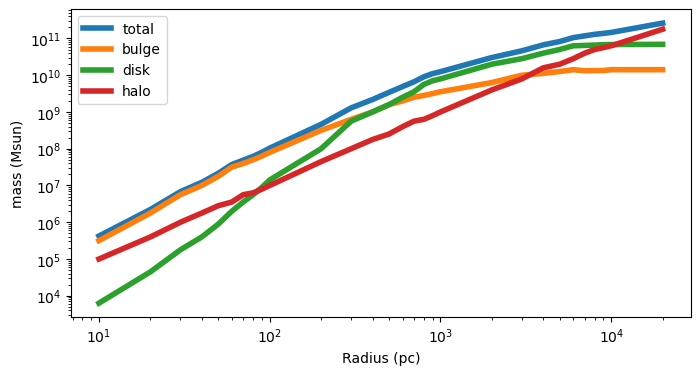

In [8]:
plt.figure(figsize = (8,4))

plt.plot(R_dist,total,label='total', linewidth=4)
plt.plot(R_dist,bulge,label='bulge', linewidth=4)
plt.plot(R_dist,disk,label='disk', linewidth=4)
plt.plot(R_dist,halo,label='halo', linewidth=4)


plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius (pc)')
plt.ylabel('mass (Msun)')


plt.legend()


**1-2**

In [9]:
bulgekg = (bulge * au.solMass).to(au.kg)
diskkg = (disk * au.solMass).to(au.kg)
halokg = (halo * au.solMass).to(au.kg)
totalkg = bulgekg + diskkg + halokg

In [10]:
#R_dist_m = (R_dist * au.pc).to(au.m)

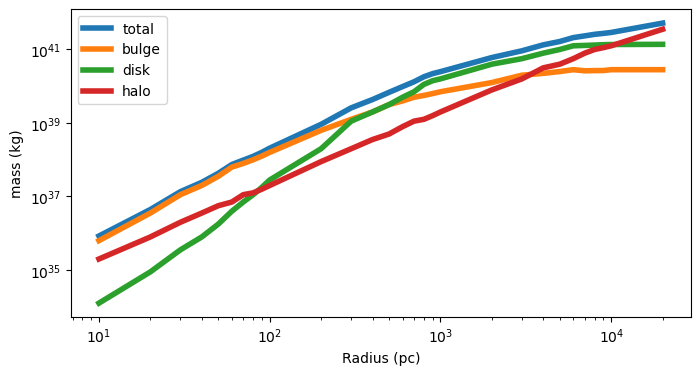

In [11]:
# checking the conversions are ok: replot w new units

plt.figure(figsize = (8,4))

plt.plot(R_dist,totalkg,label='total', linewidth=4)
plt.plot(R_dist,bulgekg,label='bulge', linewidth=4)
plt.plot(R_dist,diskkg,label='disk', linewidth=4)
plt.plot(R_dist,halokg,label='halo', linewidth=4)


plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius (pc)')
plt.ylabel('mass (kg)')


plt.legend()

In [12]:
def get_mass_index(r_list, mass_source='total'):
    #r_list = different from R_dist(_m), array of radii in **pc!! same as R_dist!!**
    #mass_source: either 'total', 'bulge', 'disk', 'halo'
    # **returns a value in kg!!!**
    
    
    index = np.argmin(abs(R_dist[:,np.newaxis]-(r_list[np.newaxis,:])),axis=0)
        # ^^ turns R_dist into a column vector, r_list into a row vector, subtracts them by broadcasting
        # over axis 0, then returns the indices of the min values 

    
    if mass_source == 'total':
        return totalkg[index]
    elif mass_source == 'bulge':
        return bulgekg[index]
    elif mass_source == 'disk':
        return diskkg[index]
    elif mass_source == 'halo':
        return halokg[index]

**velocity equation for circular orbit: v = sqrt((G * m) / r) (cos(theta - 90º) * sin(theta - 90º))**

In [13]:
# the first part of the velocity equation: v = sqrt((G * m / r))
def calc_v(r_list, mass_source='total'):
    v_list = []
    r_list_nu = (r_list * au.pc).to(au.m)
    v_list.append(np.sqrt(sc.G * get_mass_index(r_list,mass_source)/(r_list)))
    return np.array(v_list)[0] #units are m/s

# the second part of the velocity equation
def initial_v(r_list,theta):
    # r_list here is an array of radii like before, in **pc!!**
    # theta = array of intial angles in radians

    v_arr = calc_v(r_list)
    
    vx = v_arr * np.cos(theta-np.pi/2)
    vy = v_arr * np.sin(theta-np.pi/2)
    return vx,vy #units are still **[m/s]**

In [14]:
# unit rescalars
Msun_to_kg = ((1 * au.solMass)/(1 * au.kg)).to(au.kg / au.kg).value
kpc_to_meter = ((1 * au.kpc)/(1 * au.meter)).to(au.meter / au.meter).value
pc_to_meter = ((1 * au.pc)/(1 * au.meter)).to(au.meter / au.meter).value
sec_to_Myr = ((1 * au.s)/(1 * au.Myr)).to(au.s / au.s).value

Text(0.5, 0, 'r [pc]')

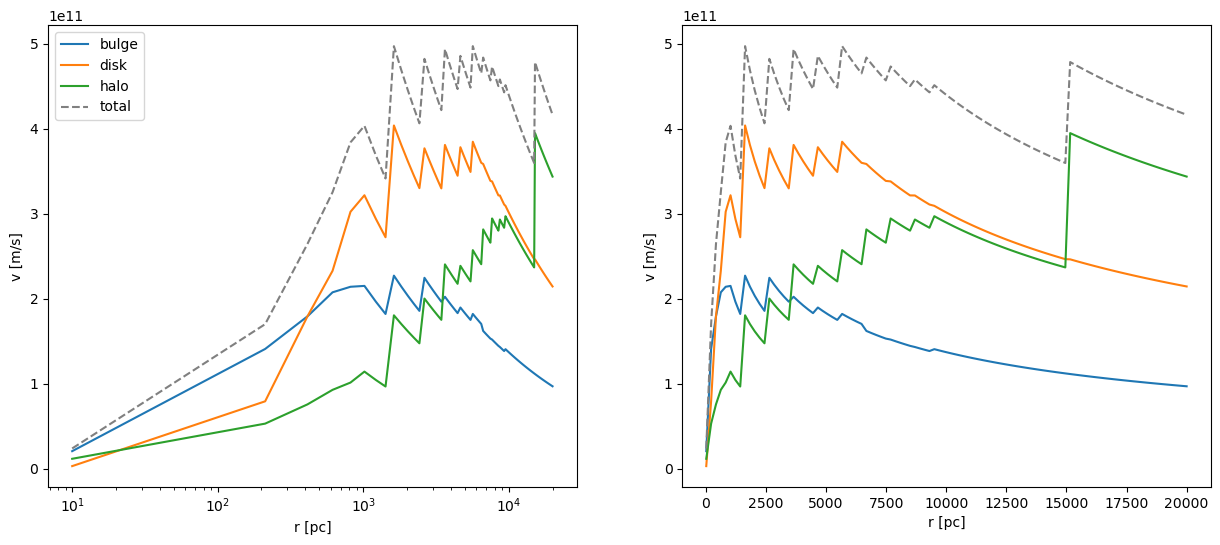

In [15]:
x_th = np.linspace(10,20000,100)
v_bulge = calc_v(x_th,'bulge')
v_disk  = calc_v(x_th,'disk')
v_halo  = calc_v(x_th,'halo')
v_full  = calc_v(x_th,'total')


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.plot(x_th,v_bulge/100,label='bulge')
ax1.plot(x_th,v_disk/100,label='disk')
ax1.plot(x_th,v_halo/100,label='halo')
ax1.plot(x_th,v_full/100,label='total',c='gray',linestyle='--')
ax1.set_xscale('log')
ax1.set_ylabel('v [m/s]')
ax1.set_xlabel('r [pc]')
ax1.legend()

ax2.plot(x_th,v_bulge/100,label='bulge')
ax2.plot(x_th,v_disk/100,label='disk')
ax2.plot(x_th,v_halo/100,label='halo')
ax2.plot(x_th,v_full/100,label='total',c='gray',linestyle='--')
ax2.set_ylabel('v [m/s]')
ax2.set_xlabel('r [pc]')

Text(0, 0.5, 'v [kpc/Myr]')

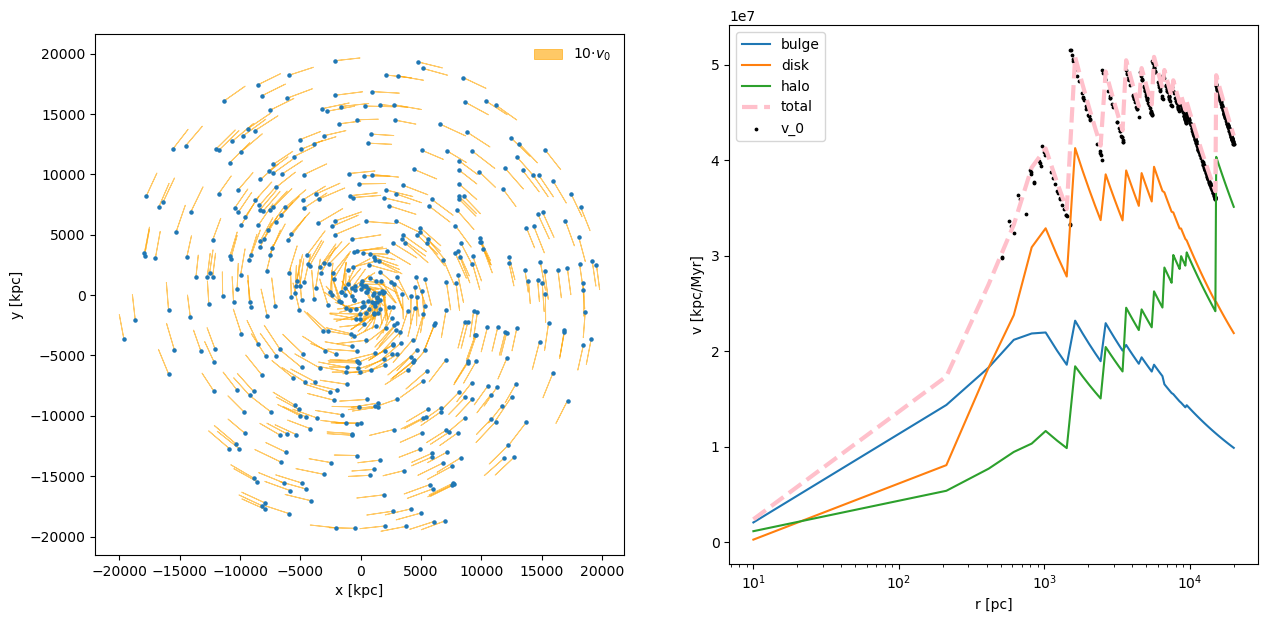

In [16]:
import numpy as np

# creating the initial condition 

def initialize(N_objects, r_min, r_max, m_min, m_max):
    #initial polar coordinates
    theta_init = np.random.uniform(0,2*np.pi, N_objects)
    r_init = np.random.uniform(r_min, r_max, N_objects)
    M_list = np.random.uniform(M_min, M_max, N_objects) # since things arent actually uniform
    
    #velocities
    vx_init, vy_init = initial_v(r_init, theta_init)
    
    # xy - coordinates 
    x_init = r_init*np.cos(theta_init)
    y_init = r_init*np.sin(theta_init)
    return x_init,y_init,vx_init,vy_init,M_list,r_init


# Initial positions and masses of objects
N_objects = 500
r_min = 0.5 * 1000 #[pc]
r_max = 20 * 1000  #[pc]
M_min = 0.5 #[Msun]
M_max = 10  #[Msun]

x_init,y_init,vx_init,vy_init,M_list,r_init = initialize(N_objects,r_min,r_max,M_min,M_max)



#saving the initial conditions 

np.save('initial_conditions',[x_init,y_init,vx_init,vy_init])
np.save('stellar_mass_list',M_list)

#loading the initial condition

x_init,y_init,vx_init,vy_init = np.load('initial_conditions.npy')
M_list = np.load('stellar_mass_list.npy')

# plotting the initial condition 

v_list = np.sqrt(vx_init**2+vy_init**2)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))
ax1.scatter(x_init,y_init,s=5,zorder=1)
for x,y,vx,vy in zip(x_init,y_init,vx_init,vy_init):
    arr = ax1.arrow(x,y,vx*0.5e-10,vy*0.5e-10,lw=0.7,color='orange',alpha=0.6,zorder=0,head_width=0.4,head_length=0.4)
ax1.legend([arr],[r'10$\cdot v_0$'],frameon=False,loc=1)
ax1.set_aspect('equal')
ax1.set_xlabel('x [kpc]')
ax1.set_ylabel('y [kpc]')


ax2.plot(x_th,v_bulge/kpc_to_meter/sec_to_Myr,label='bulge')
ax2.plot(x_th,v_disk/kpc_to_meter/sec_to_Myr,label='disk')
ax2.plot(x_th,v_halo/kpc_to_meter/sec_to_Myr,label='halo')
ax2.plot(x_th,v_full/kpc_to_meter/sec_to_Myr,label='total',c='pink',linestyle='--',lw=3)
ax2.scatter(r_init,v_list*1e-6,s=3,label=r'v_0',zorder=0,c='k')
ax2.set_xscale('log')
ax2.legend()
ax2.set_xlabel('r [pc]')
ax2.set_ylabel('v [kpc/Myr]')
#plt.savefig('initial_condition.pdf',bbox_to_inches='tight')

In [17]:
def calc_F(x_list,y_list,M_list,):
    '''
    Calculates the gravitational interaction between each particle and the global gravitational potential
    input:
        x_list: an array of x-coordinates of objects [kpc]
        y_list: an array of y-coordinates of objects [kpc]
        M_list: an array of stellar masses [Msun]
    output:
        Fx,Fy: arrays of forces decomposed to xy-directions in SI units [Newtons]
    '''
    #### N-body forces (small forces, particle interactions: log10(M)~1 for most of the objects):
    # vec{F} = GMM/r^2 * \hat{r} = GMM/R^3 * \vec{r}
    # some operations are faster to use np.XXX() functions rather than regular operators (e.g. +,*,**)
    # because some parts of this is 2-D matrix operation
    
    #units
    Msun_to_kg = ((1*au.solMass)/(1*au.kg)).to(au.kg/au.kg).value
    pc_to_meter = ((1*au.pc)/(1*au.meter)).to(au.meter/au.meter).value
    
    # distance
    Dx = -(x_list[:,np.newaxis]-x_list[np.newaxis,:])*pc_to_meter
    Dy = -(y_list[:,np.newaxis]-y_list[np.newaxis,:])*pc_to_meter
    D  = np.sqrt(np.add(np.power(Dx,2),np.power(Dy,2)))
    D3 = np.power(D,3) # |r|^3
    
    # Mass
    MM = (M_list[:,np.newaxis]*M_list[np.newaxis,:])*Msun_to_kg**2
    GMM = np.multiply(G,MM)
    
    # Force
    Fx_N  = np.nansum(np.multiply(np.divide(GMM,D3),Dx),axis=1)
    Fy_N  = np.nansum(np.multiply(np.divide(GMM,D3),Dy),axis=1)
    
    #### Galaxy global force (large centripital force, fixed center of rotation, log10(M_gal)~11-12)
    # this part does not take much time to compute (because this is 1-D operation)
    R = np.sqrt(x_list**2+y_list**2)
    M_gal = get_mass_index(R)*Msun_to_kg # do not correct R to SI units: get_mass_index() expects [kpc]
    Fx_gal = G*M_gal.value*(M_list*Msun_to_kg)/(R*pc_to_meter)**3 * (-x_list*pc_to_meter)
    Fy_gal = G*M_gal.value*(M_list*Msun_to_kg)/(R*pc_to_meter)**3 * (-y_list*pc_to_meter)
    #print(np.shape(Fx_N), np.shape(Fx_gal))
    
    #### combine two forces
    Fx = []
    for i in np.arange(len(Fx_N)):
        Fx = np.append(Fx, Fx_N[i] + Fx_gal[i])
  #  Fx = Fx_N[0] + Fx_gal[0]
    Fy = []
    for i in np.arange(len(Fy_N)):
        Fy = np.append(Fy, Fy_N[i] + Fy_gal[i])
    #Fy = Fy_N + Fy_gal
    return Fx,Fy # [Newton]

In [18]:
start = time.time()
for _ in range(100):
    Fx,Fy = calc_F(x_init,y_init,M_list)
print(f'average calc_F() execution time: {(time.time()-start)/100:.4f} sec')

/tmp/ipykernel_295/3796224183.py:31: RuntimeWarning: divide by zero encountered in true_divide
  Fx_N  = np.nansum(np.multiply(np.divide(GMM,D3),Dx),axis=1)
/tmp/ipykernel_295/3796224183.py:31: RuntimeWarning: invalid value encountered in multiply
  Fx_N  = np.nansum(np.multiply(np.divide(GMM,D3),Dx),axis=1)
/tmp/ipykernel_295/3796224183.py:32: RuntimeWarning: divide by zero encountered in true_divide
  Fy_N  = np.nansum(np.multiply(np.divide(GMM,D3),Dy),axis=1)
/tmp/ipykernel_295/3796224183.py:32: RuntimeWarning: invalid value encountered in multiply
  Fy_N  = np.nansum(np.multiply(np.divide(GMM,D3),Dy),axis=1)


average calc_F() execution time: 0.0448 sec


In [19]:
Fx,Fy = calc_F(x_init,y_init,M_list)

/tmp/ipykernel_295/3796224183.py:31: RuntimeWarning: divide by zero encountered in true_divide
  Fx_N  = np.nansum(np.multiply(np.divide(GMM,D3),Dx),axis=1)
/tmp/ipykernel_295/3796224183.py:31: RuntimeWarning: invalid value encountered in multiply
  Fx_N  = np.nansum(np.multiply(np.divide(GMM,D3),Dx),axis=1)
/tmp/ipykernel_295/3796224183.py:32: RuntimeWarning: divide by zero encountered in true_divide
  Fy_N  = np.nansum(np.multiply(np.divide(GMM,D3),Dy),axis=1)
/tmp/ipykernel_295/3796224183.py:32: RuntimeWarning: invalid value encountered in multiply
  Fy_N  = np.nansum(np.multiply(np.divide(GMM,D3),Dy),axis=1)


Text(0, 0.5, 'y [pc]')

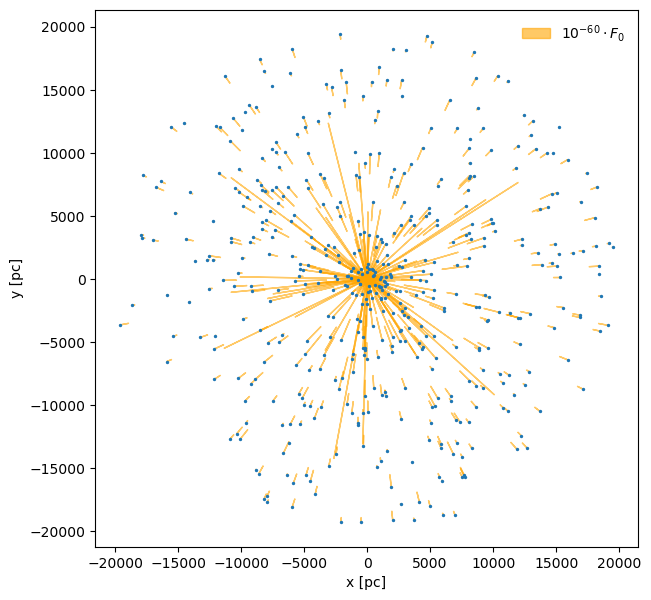

In [20]:
fig,ax1 = plt.subplots(1,1,figsize=(7,7))
ax1.scatter(x_init,y_init,s=2,zorder=1)
for x,y,fx,fy in zip(x_init,y_init,Fx,Fy):
    arr = ax1.arrow(x,y,fx*20e-50,fy*20e-50,lw=1,color='orange',alpha=0.6,zorder=0)
ax1.legend([arr],[r'$10^{-60}\cdot F_0$'],frameon=False,loc=1)
ax1.set_aspect('equal')
ax1.set_xlabel('x [pc]')
ax1.set_ylabel('y [pc]')

In [22]:
# Some conversions.

from astropy import units as u

AU_kg = ((1*u.solMass)/(1*u.kg)).to(u.kg/u.kg).value
kpc_meter = ((1*u.kpc)/(1*u.meter)).to(u.meter/u.meter).value
sec_myr = ((1*u.s)/(1*u.Myr)).to(u.s/u.s).value

In [23]:
acceleration_rescaled_units = (1/kpc_meter)/(sec_myr**2)

In [24]:
# Let's calculate some derivatives, and collect them into an array.

def derivative_calculator(values,mass_list):
  x_list, y_list, v_x_list, v_y_list = values
  dx_dt = v_x_list
  dy_dt = v_y_list

  F_x, F_y = calc_F(x_list, y_list, mass_list)
  dv_x_dt = F_x/(mass_list*AU_kg)*acceleration_rescaled_units #a_x
  dv_y_dt = F_y/(mass_list*AU_kg)*acceleration_rescaled_units #a_y

  return np.array([dx_dt, dy_dt, dv_x_dt, dv_y_dt])

In [85]:
# Let's perform the time evolution.

def runge_kutta(old_values, mass_list, dt):
  old_values = np.array(old_values)
  k1 = old_values + .5 * dt*derivative_calculator(old_values,mass_list)
  k2 = old_values + .5 * dt*derivative_calculator(k1,mass_list)
  k3 = old_values + dt*derivative_calculator(k2,mass_list)
  k4 = dt*derivative_calculator(k3,mass_list)
  return (k1 + 2*k2 + k3)/3 + k4/6 - old_values/3

In [86]:
# Suggestions for some values.

dt = 0.1
t_max = 500

In [87]:
# 'divide by zero' warnings are expected. Run this only after checking all other parts are working
from warnings import filterwarnings
filterwarnings(action='ignore')

In [88]:
def run_simulation(val_init,M_list,dt,t_max,save_interval):
    t = 0
    val_old = val_init
    data = []
    t_list = []
    while t<=tmax:
        print(f'\rsimulating... t={t}/{tmax}',end='')
        val_new = runge_kutta(val_old,M_list,dt)
        t += dt
        if t%save_interval==0:
            data.append(val_new)
            t_list.append(t)
        val_old = val_new
    return data,t_list

In [89]:
# initial conditions & simulation parameters 
val_init = [x_init,y_init,vx_init,vy_init]
dt   = 0.5  # [Myr]
tmax = 300  # [Myr]
save_interval = 1 # this needs to be an integer multiple of dt

data,t_list = run_simulation(val_init,M_list,dt,tmax,save_interval)


simulating... t=300.0/300

In [90]:
np.save('sim data',[data,t_list])

In [73]:
#ANIMATION TIME

In [74]:
data[1]

array([[            inf, 6.36834705e+305, 8.04770550e+302, ...,
        4.87737219e+306, 2.57274518e+303,             inf],
       [            inf, 6.36834697e+305, 8.04770530e+302, ...,
        4.87737213e+306, 2.57274525e+303,             inf],
       [3.17569043e+210, 3.06787603e+202, 2.71502258e+201, ...,
        1.20807642e+206, 2.56401266e+206, 1.08842468e+207],
       [2.51560467e+210, 1.14486942e+203, 2.47766302e+205, ...,
        1.33625213e+205, 1.02780598e+204, 3.85082908e+207]])

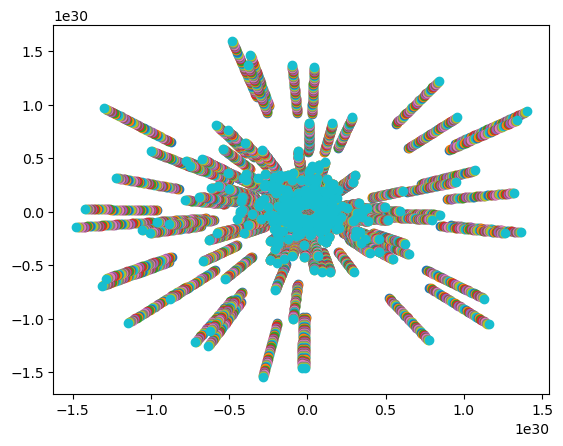

In [91]:
for i in np.arange(100,150):
    x, y, vx, vy = data[i]
    plt.scatter(x, y)
    # that doesn't look good

<Figure size 1280x960 with 0 Axes>

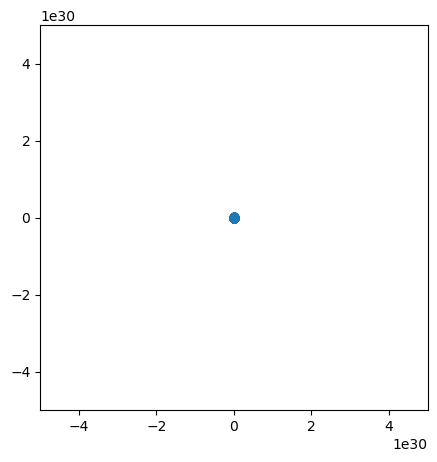

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [93]:
metadata = dict(title='sim', artist = 'matplotlib')
writer = FFMpegWriter(fps=50, metadata = metadata, bitrate = 200000)
fig = plt.figure(dpi=200)

fig, ax = plt.subplots(figsize=(5,5))

with writer.saving(fig, 'gal.mp4', dpi=200):
    for i in range(len(t_list)):
        ax.clear()
        
        x, y, vx, vy = (data[i])

        ax.scatter(x, y)
        ax.set_xlim(-5e30, 5e30)
        ax.set_ylim(-5e30, 5e30)

        
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()